In [1]:
from apy import *
from apy.amedia import *

[464 444   3]


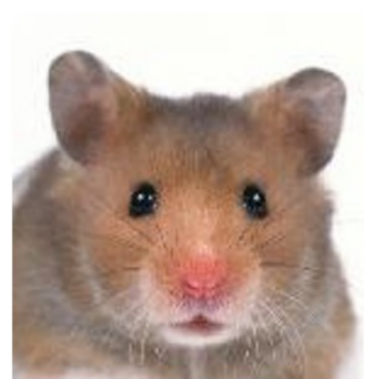

In [2]:
im = Image("./inputs/mouse.png").GetRGBCopy().GetFloatCopy()
im.show()
print(im.shape)

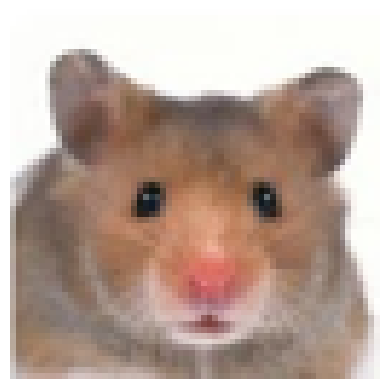

In [3]:
scaled = im.GetScaled([64,64]).GetFloatCopy();
scaled.show()

In [4]:
64*64

4096

In [5]:
# mouse_cbm = acimops.bilateral.getCrossBilateralMatrix(scaled.fpixels, [1,1,0.1]);
mouse_gm = acimops.bilateral.getGaussianCirculantMatrix(scaled.fpixels, [1,1,0.1]);

In [6]:
mouse_gm.shape

(4096, 4096)

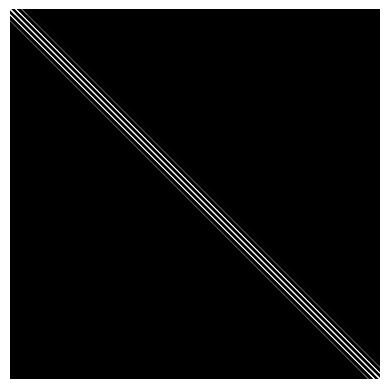

In [7]:
mgi = Image(pixels=mouse_gm*100);
mgi.show()

In [8]:
mgi.writeToFile("./MouseGaussMatrix.png")

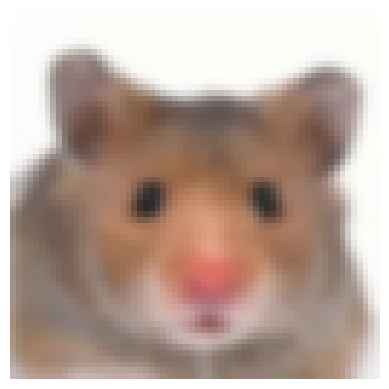

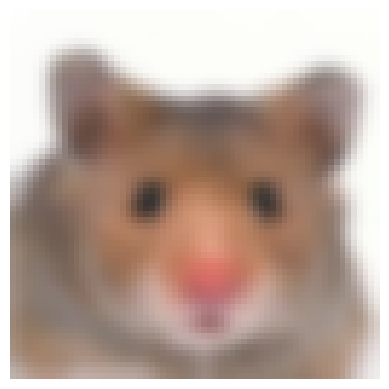

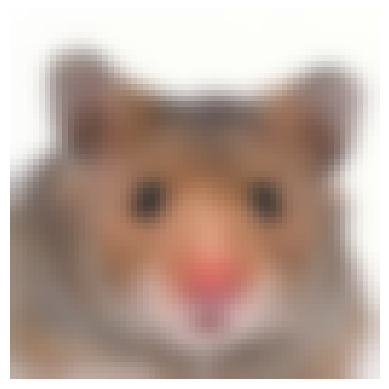

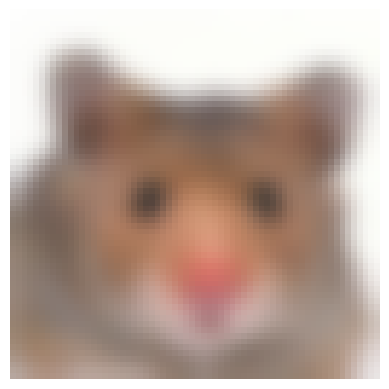

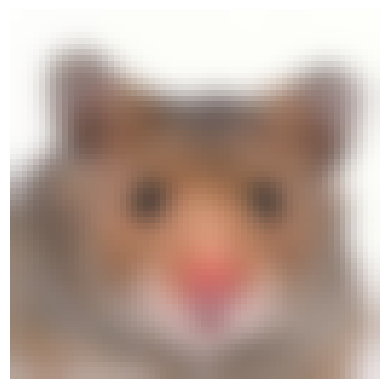

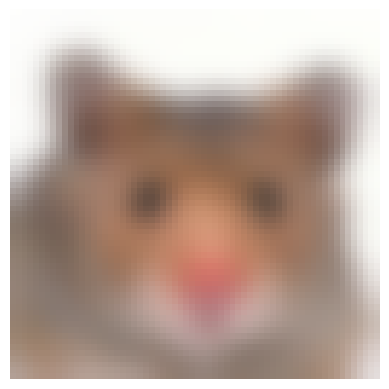

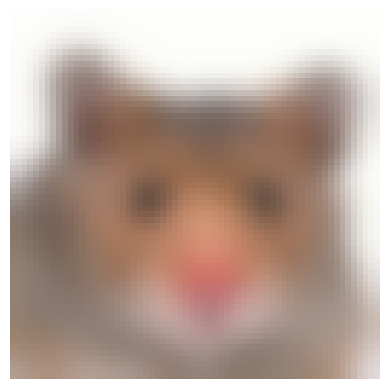

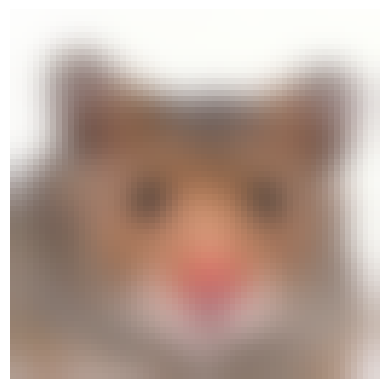

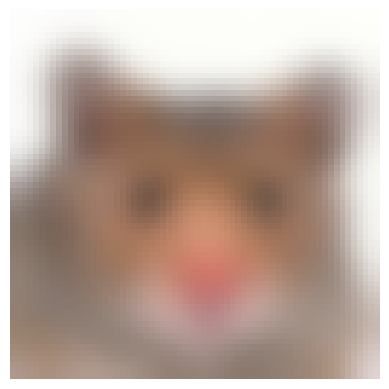

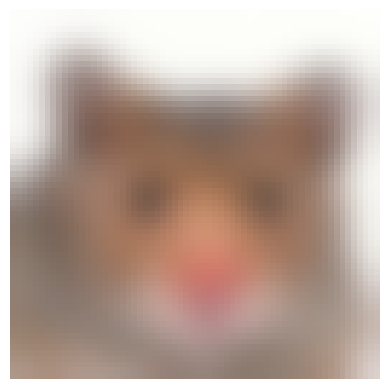

In [9]:
def mouse_gfi(image):
    rpix = np.reshape(image.pixels[:,:,0], 64*64);
    gpix = np.reshape(image.pixels[:,:,1], 64*64);
    bpix = np.reshape(image.pixels[:,:,2], 64*64);
    rpix_filtered = mouse_gm@rpix;
    gpix_filtered = mouse_gm@gpix;
    bpix_filtered = mouse_gm@bpix;
    return Image(pixels=np.dstack([
        np.reshape(rpix_filtered, [64,64]),
        np.reshape(gpix_filtered, [64,64]),
        np.reshape(bpix_filtered, [64,64])]
    ));




current = scaled.clone();
filtered = [current];

for i in range(10):
    current = mouse_gfi(current);
    filtered.append(current);
    current.show()
    


# test = np.reshape(np.arange(100), [10,10])